# More Imaging: Filters and Flood Fill 

## 11/16/2023

<a href="?print-pdf">print view</a>

<a href="bioimaging2.ipynb">notebook</a>

In [1]:
%%html
<script src="https://bits.csb.pitt.edu/preamble.js"></script>

# Woof

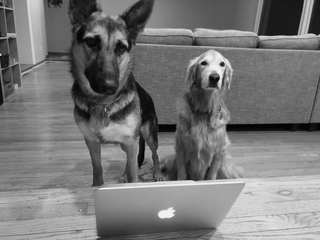

In [2]:
import numpy as np; import matplotlib.pyplot as plt; import matplotlib.cm as cm
%matplotlib inline
from PIL import Image
im = Image.open('imgs/dogs.png')
im

# Single Pixel Modification

As a reminder, we can use the `point` method to apply an arbitrary function to each pixel.

In [3]:
pointed = im.point(lambda x: x+100)

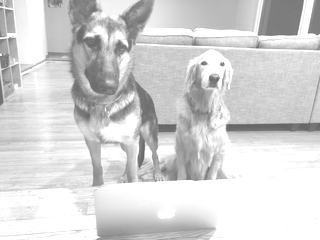

In [4]:
pointed

# Filters

A filter applies a *convolution kernel* to an image.  

Although this sounds fancy, this is just a generalization of the `point` method where the function takes as input the neighborhood of the pixels.

The kernel is represented by an $n$x$n$ matrix where the target pixel is in the center.  

The output of the filter is the sum of the products of the matrix elements with the corresponding pixels.

Examples (from [Wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing)):

<table style="border: 0px solid black; text-align=center">
<tr><td><img src="https://upload.wikimedia.org/math/7/a/d/7ad9f1c26f76bc1ee55fdf0ef8c6197a.png"></td>
<td>
<img src="https://upload.wikimedia.org/math/3/0/c/30c42f667a353a5f0fbe92b0c4f2eee1.png">
</td>
<td>
<img src="https://upload.wikimedia.org/math/7/d/d/7ddb57480ef9fa57e2d1c2b3ffecb291.png">
</td>
</tr>
<tr><td>Identity</td><td>Blur</td><td>Edge Detection</td>
</table>

In [5]:
%%html
<div id="im2ef" style="width: 500px"></div>
<script>

    var divid = '#im2ef';
	jQuery(divid).asker({
	    id: divid,
	    question: "If a pixel and all its neighbors are the same color, how will its color change after applying the edge detection filter?",
		answers: ['Same','Brighter','Darker','Black',"White"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Filters

The PIL ImageFilter module includes a number of built-in convolution kernels that can be applied using the image `filter` method.

In [6]:
from PIL import ImageFilter

print(ImageFilter.SMOOTH.filterargs) #shape, denominator, offset, coefficients

((3, 3), 13, 0, (1, 1, 1, 1, 5, 1, 1, 1, 1))


In [7]:
filt = ImageFilter.SMOOTH.filterargs
print(np.array(filt[3]).reshape(filt[0]),filt[1])

[[1 1 1]
 [1 5 1]
 [1 1 1]] 13


The output is the sum of the product of the coefficients and the corresponding pixels divided by the denominator and incremented by the offset.

In [8]:
def twoimgs(im1,im2):
    '''Return the result of putting two images next to each other'''
    w = im1.width+im2.width
    h = im1.height
    im = Image.new('RGB', (w, h))
    im.paste(im1, (0,0))
    im.paste(im2, (im1.width,0))
    return im

# BLUR

[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]] 16


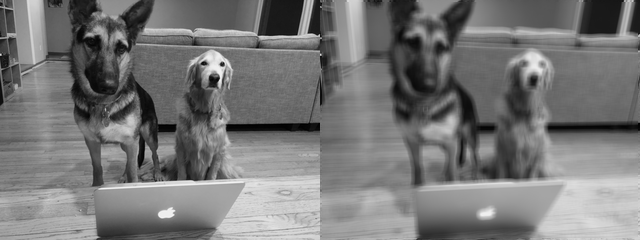

In [9]:
filt = ImageFilter.BLUR.filterargs
print(np.array(filt[3]).reshape(filt[0]),filt[1])
twoimgs(im,im.filter(ImageFilter.BLUR))

# SMOOTH

[[1 1 1]
 [1 5 1]
 [1 1 1]] 13


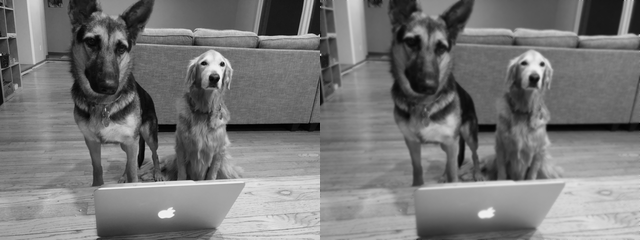

In [10]:
filt = ImageFilter.SMOOTH.filterargs
print(np.array(filt[3]).reshape(filt[0]),filt[1])
twoimgs(im,im.filter(ImageFilter.SMOOTH))

# FIND_EDGES

In [11]:
filt = ImageFilter.FIND_EDGES.filterargs
print(np.array(filt[3]).reshape(filt[0]),filt[1])

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]] 1


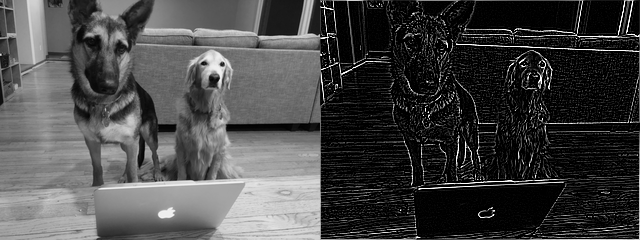

In [12]:
twoimgs(im,im.filter(ImageFilter.FIND_EDGES))

# SHARPEN

[[-2 -2 -2]
 [-2 32 -2]
 [-2 -2 -2]] 16


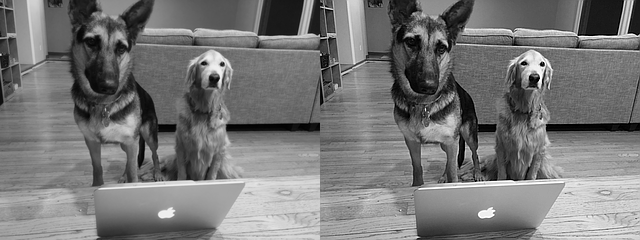

In [13]:
filt = ImageFilter.SHARPEN.filterargs
print(np.array(filt[3]).reshape(filt[0]),filt[1])
twoimgs(im,im.filter(ImageFilter.SHARPEN))

# Non-linear Filters

There are also non-linear filters that don't compute sums of products. Instead, they compare the values of the neighboring pixels (e.g., max value, min value, median value).

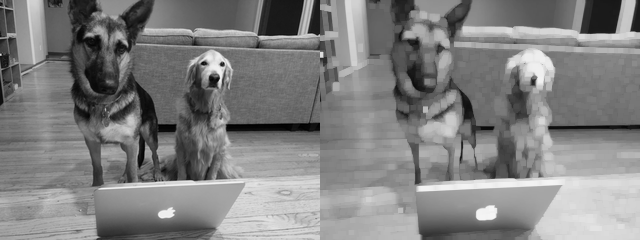

In [14]:
twoimgs(im,im.filter(ImageFilter.MaxFilter(5)))

# Recursion - It's as easy as 1,1,2,3

Recursion is when a function calls itself on a small version of the problem to compute the answer.

It is a very useful way to think about complex, but decomposable, problems.

<img src="https://imgs.xkcd.com/comics/tabletop_roleplaying.png" width="300">

In [15]:
def fib(n):
    if n <= 1: return 1
    return fib(n-1)+fib(n-2)

fib(5)

8

A recursive function must have a *base case*, an input that is eventually reached that does not require any further calls to the function ($n \le 1$ above).

What happens if you forget the base case?

In [16]:
def brokenfib(n):
    return brokenfib(n-1)+brokenfib(n-2)

brokenfib(5)

RecursionError: maximum recursion depth exceeded

# The Call Stack

Every time you call a function, the function and its arguments are placed on the call stack.

The call stack will eventually run out of memory.

Python limits how many calls can be on the call stack.

In [17]:
import sys
sys.getrecursionlimit()

3000

In [18]:
sys.setrecursionlimit(6000) #broken fib will now take twice as long to crash

# Recursive Functions

1. Must have base case - can provide the answer without further recursive calls (`if n <= 1: return 1`)
2. Must make progress towards base case (`n-1`, `n-2`)
3. Must make recursive call(s) (`fib(n-1)`, `fib(n-2)`)
4. Must compute current (n) answer using recursive calls (`fib(n-1)+fib(n-2)`)
5. Must return answer

In [19]:
def fun(L):
    val = L[0]
    if len(L) == 1: return val
    val2 = fun(L[1:])
    if val > val2: return val
    return val2

In [20]:
fun([9,4,6,1,3,10,2])

10

In [21]:
%%html
<div id="im2rec" style="width: 500px"></div>
<script>

    var divid = '#im2rec';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the return value of <tt>fun([9,4,6,1,3,10,2])</tt>?",
		answers: ['9','4','35','1','3','10','2','Error'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Flood Fill - Implementing the Paint Bucket

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Recursive_Flood_Fill_4_%28aka%29.gif">

Click on a pixel, fill that pixel and all touching pixels of the same color with the fill color.

`Flood-fill (pixel, target-color, replacement-color)`

What is/are the recursive step(s)?

What is the base case?

# The Algorithm (from Wikipedia)

Flood-fill (pixel, target-color, replacement-color):
 1. If target-color is equal to replacement-color, return.
 2. If the color of pixel is not equal to target-color, return.
 3. Set the color of pixel to replacement-color.
 4. Perform Flood-fill (one step to the west of pixel, target-color, replacement-color).<br>
    Perform Flood-fill (one step to the east of pixel, target-color, replacement-color).<br>
    Perform Flood-fill (one step to the north of pixel, target-color, replacement-color).<br>
    Perform Flood-fill (one step to the south of pixel, target-color, replacement-color).
 5. Return.

In [22]:
!wget http://bits.csb.pitt.edu/images/image1.tif

--2023-10-30 20:44:07--  http://bits.csb.pitt.edu/images/image1.tif
Resolving bits.csb.pitt.edu (bits.csb.pitt.edu)... 136.142.4.139
Connecting to bits.csb.pitt.edu (bits.csb.pitt.edu)|136.142.4.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 921814 (900K) [image/tiff]
Saving to: ‘image1.tif.1’

image1.tif.1        100%[===================>] 900.21K  --.-KB/s    in 0.02s   

2023-10-30 20:44:07 (55.5 MB/s) - ‘image1.tif.1’ saved [921814/921814]



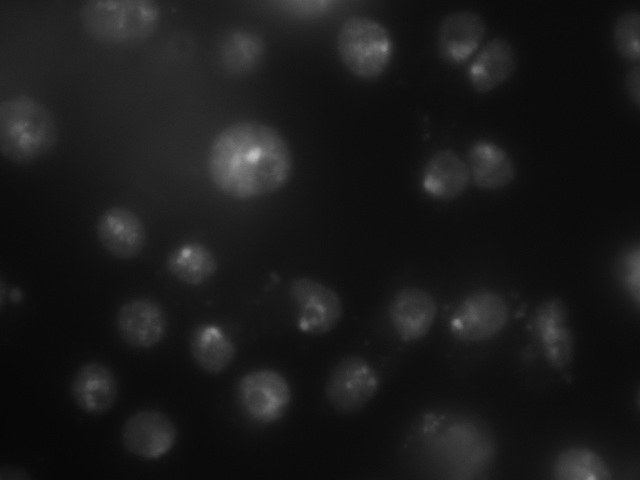

In [23]:
im = Image.open('image1.tif')
(r,g,b) = im.split()
b

# Counting Cells (or at least blobs of light)

The idea is to threshold the image and then count the number of white blobs.

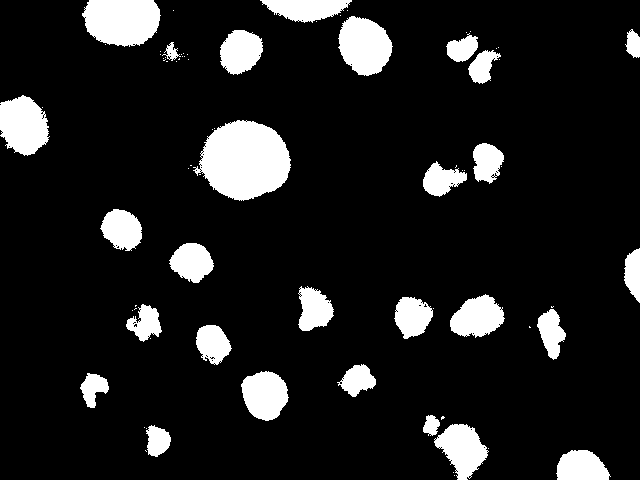

In [24]:
blobs = b.point(lambda x: 255 if x > 45 else 0)
blobs

# Project

* Implement a flood fill function.
  * There's some details missing from the algorithm...
  * You will need to load the pixel map with `load`
  * You will need to pass the width and height of the image to avoid going off the edge
  * You will likely need to increase the recursion limit
* For every pixel in the image, if it is white (255) flood fill it with gray (128)
* Count the number of times you do this
* Display the final image
* Display the average cell size.  Its distribution.

In [25]:
blobs = b.point(lambda x: 255 if x > 45 else 0)

pixels = blobs.load()
width = blobs.width
height = blobs.height

def flood(x,y,w,h,pixels):
    #hard code colors
    if x < 0 or x >= w:
        return 0
    if y < 0 or y >= h:
        return 0
    if pixels[x,y] != 255:
        return 0
    pixels[x,y] = 128
    ret = 1
    ret += flood(x-1,y,w,h,pixels)
    ret += flood(x+1,y,w,h,pixels)
    ret += flood(x,y-1,w,h,pixels)
    ret += flood(x,y+1,w,h,pixels)
    return ret
    
sizes = []
for i in range(width):
    for j in range(height):
        if pixels[i,j] == 255:
            sizes.append(flood(i,j,width,height,pixels))        

In [26]:
len(sizes)

166

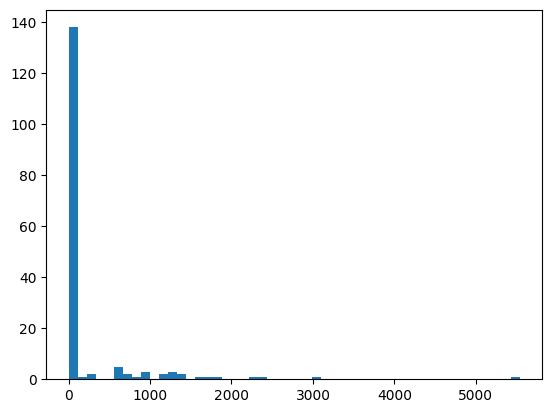

In [27]:
plt.hist(sizes,bins=50);

In [28]:
def flood(x,y,w,h,pixels):
    #hard code colors
    if x < 0 or x >= w:
        return
    if y < 0 or y >= h:
        return
    if pixels[x,y] != 255:
        return
    pixels[x,y] = 128
    flood(x-1,y,w,h,pixels)
    flood(x+1,y,w,h,pixels)
    flood(x,y-1,w,h,pixels)
    flood(x,y+1,w,h,pixels)


In [29]:
blobs = b.point(lambda x: 255 if x > 45 else 0)

pixels = blobs.load()

def flood(x,y,w,h,pixels):
    pass #implement

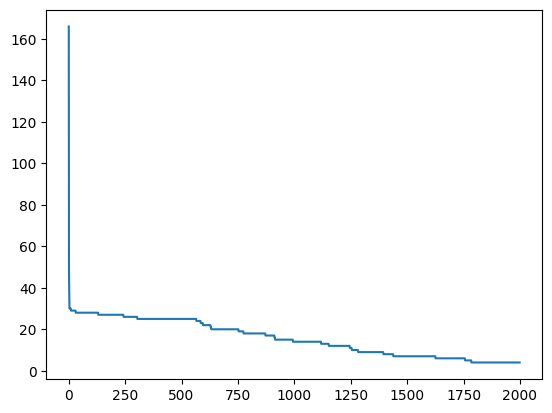

In [30]:
plt.plot([np.count_nonzero(np.array(sizes) > t) for t in range(2000)])